In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('D:\csvs\strbcks\starbucks.csv')

In [2]:
print(data.head()) # Display the first few rows of the data

print(data.describe()) # Summary statistics

print(data.isnull().sum()) # Check for missing values

   Unnamed: 0                         item  calories   fat  carb  fiber  \
0           1                 8-Grain Roll       350   8.0    67      5   
1           2            Apple Bran Muffin       350   9.0    64      7   
2           3                Apple Fritter       420  20.0    59      0   
3           4              Banana Nut Loaf       490  19.0    75      4   
4           5  Birthday Cake Mini Doughnut       130   6.0    17      0   

   protein    type  
0       10  bakery  
1        6  bakery  
2        5  bakery  
3        7  bakery  
4        0  bakery  
       Unnamed: 0    calories        fat       carb      fiber    protein
count   77.000000   77.000000  77.000000  77.000000  77.000000  77.000000
mean    39.000000  338.831169  13.766234  44.870130   2.220779   9.480519
std     22.371857  105.368701   7.095488  16.551634   2.112764   8.079556
min      1.000000   80.000000   0.000000  16.000000   0.000000   0.000000
25%     20.000000  300.000000   9.000000  31.000000  

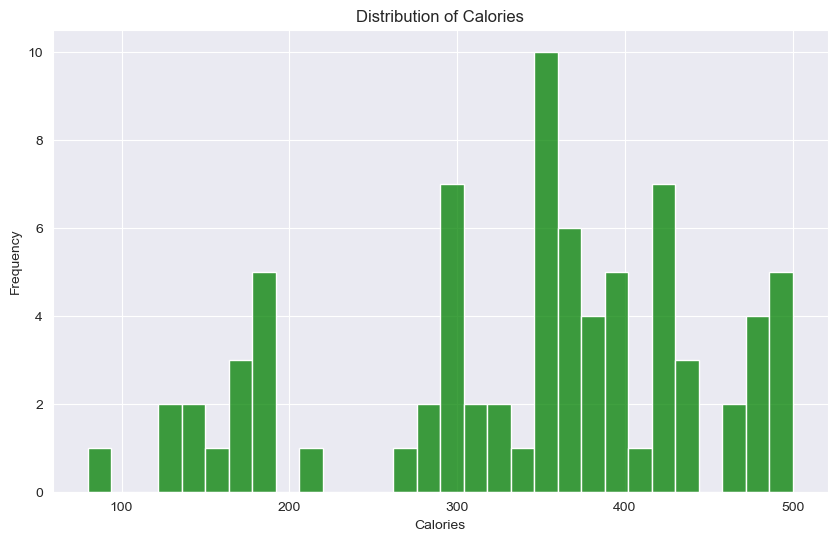

In [3]:
# Plot the distribution of calories
plt.figure(figsize=(10,6))
sns.histplot(data['calories'], bins=30, color='green')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

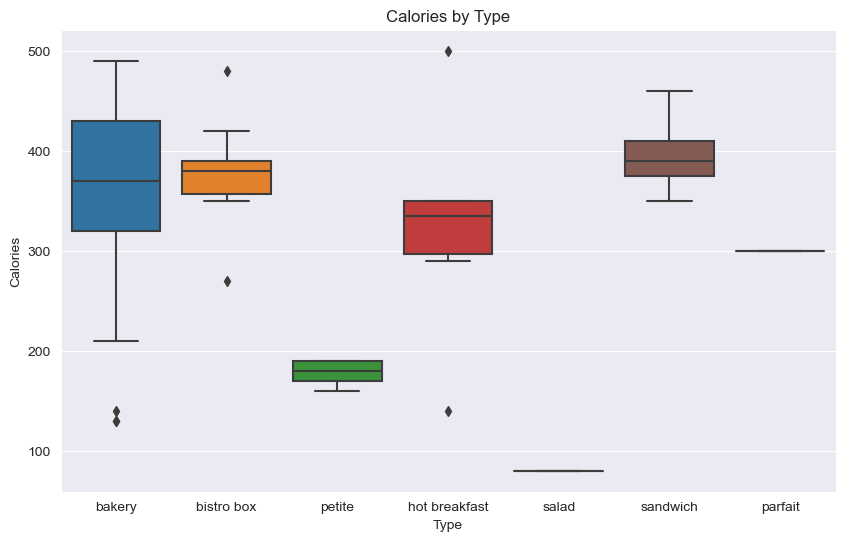

In [4]:
# Boxplot of calories by type
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='calories', data=data)
plt.title('Calories by Type')
plt.xlabel('Type')
plt.ylabel('Calories')
plt.show()

C:\Users\lanyp\AppData\Local\Temp\ipykernel_9680\1574983617.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_subset.corr()


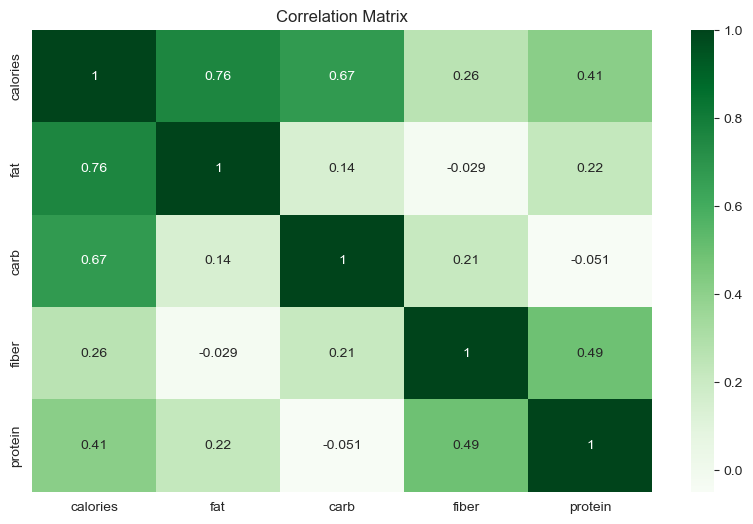

In [5]:
columns_to_exclude = ["Unnamed: 0", "type"]
data_subset = data.drop(columns=columns_to_exclude)
corr = data_subset.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Remove unnecessary columns
data = data.drop(columns=['item'])

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['fat', 'carb', 'fiber', 'protein']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['type'])
    ])

# Split the data into training and testing sets
X = data.drop('calories', axis=1)
y = data['calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2020.23375
Root Mean Squared Error: 44.94701046788318
Mean Absolute Error: 25.137500000000003
